In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # 훈련셋과 테스트셋을 분리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [6]:
# 1. 데이터 셋 생성
raw_data = pd.read_excel("./data/heart-disease.xlsx")
# http://archive.ics.uci.edu/ml/datasets/heart+disease
raw_data.head()

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshtbps     303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  heartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [7]:
raw_data[(raw_data['chol']=='?') | (raw_data['ca']=='?') | 
                 (raw_data['hsl']=='?')]

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [8]:
clean_data = raw_data.replace('?', np.nan)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshtbps     303 non-null    int64  
 4   chol          302 non-null    float64
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            299 non-null    float64
 12  hsl           301 non-null    float64
 13  heartDisease  303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [10]:
clean_data.dropna(how='any', inplace=True) # 결측치가 하나라도 있는 행은 제거
clean_data.isna().sum()

age             0
sex             0
cp              0
treshtbps       0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hsl             0
heartDisease    0
dtype: int64

In [13]:
# 독립변수(입력변수), 타겟변수(종속변수)
Input = clean_data.iloc[:, :-1]
Target = clean_data.iloc[:,[-1]] # 2차원 데이터
Target

,heartDisease
0,0
1,1
3,0
4,0
5,0
...,...
297,1
298,1
299,1
300,1


In [15]:
# 전체 데이터 296개 중 심장병 걸린 데이터 수
Target['heartDisease'].sum()

136

In [16]:
Target['heartDisease'].mean()

0.4594594594594595

In [17]:
Target['heartDisease'].value_counts()

0    160
1    136
Name: heartDisease, dtype: int64

In [21]:
# Scale 조정
scaler = MinMaxScaler()
scaler.fit(Input)
scaled_input = pd.DataFrame(scaler.transform(Input))
scaled_input

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,0.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
3,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
4,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.0,0.816794,0.0,0.129032,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.583333,0.0,1.000000,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,0.5,0.000000,1.00
292,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
293,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
294,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00


In [22]:
# scaled_input, Target -> 학습셋 : 테스트셋 = 7:3
X_train, X_test, Y_train, Y_test = train_test_split(scaled_input, Target,
                                        test_size=0.3, random_state=5)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((207, 13), (207, 1), (89, 13), (89, 1))

In [23]:
# 2. 모델구성
model = Sequential()
model.add(Dense(units=500, input_dim=13, activation='tanh'))
# 과적합을 해결하고자 기억하되 두루뭉실하게 기억하자
model.add(Dropout(0.1)) 
model.add(Dense(units=200, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               7000      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [24]:
# 3. 학습과정 설정
# 분류분석일때, 성능평가지표 : 
# accuracy(정확도) : 예측결과와 실제값이 동일한 건수/전체건수
# recall(재현율) : 실제True인데 예측도 True로 한 건수 /실제 True인 건수
# precision(정밀도, 민감도) : 실제True인데 예측도 True로 한 건수 / True로 예측한 건수
from tensorflow.keras import metrics
model.compile(loss='binary_crossentropy', optimizer="adam",
             metrics=['accuracy', metrics.Recall(), metrics.Precision()])

In [25]:
# 4. 학습시키기
hist = model.fit(X_train, Y_train, epochs=50, batch_size=50, verbose=2,
                validation_split=0.2)

Epoch 1/50
4/4 - 1s - loss: 0.6659 - accuracy: 0.6000 - recall: 0.2647 - precision: 0.5294 - val_loss: 0.4979 - val_accuracy: 0.8571 - val_recall: 0.9048 - val_precision: 0.8261
Epoch 2/50
4/4 - 0s - loss: 0.5237 - accuracy: 0.7455 - recall: 0.8971 - precision: 0.6354 - val_loss: 0.3952 - val_accuracy: 0.8810 - val_recall: 0.8095 - val_precision: 0.9444
Epoch 3/50
4/4 - 0s - loss: 0.4178 - accuracy: 0.8303 - recall: 0.7794 - precision: 0.8030 - val_loss: 0.4557 - val_accuracy: 0.7619 - val_recall: 0.5238 - val_precision: 1.0000
Epoch 4/50
4/4 - 0s - loss: 0.4152 - accuracy: 0.8121 - recall: 0.7059 - precision: 0.8136 - val_loss: 0.3368 - val_accuracy: 0.8810 - val_recall: 0.7619 - val_precision: 1.0000
Epoch 5/50
4/4 - 0s - loss: 0.3882 - accuracy: 0.8242 - recall: 0.7941 - precision: 0.7826 - val_loss: 0.3673 - val_accuracy: 0.8571 - val_recall: 0.7143 - val_precision: 1.0000
Epoch 6/50
4/4 - 0s - loss: 0.3776 - accuracy: 0.8424 - recall: 0.7647 - precision: 0.8387 - val_loss: 0.4036 

Epoch 47/50
4/4 - 0s - loss: 0.3113 - accuracy: 0.8606 - recall: 0.8382 - precision: 0.8261 - val_loss: 0.3667 - val_accuracy: 0.8571 - val_recall: 0.8095 - val_precision: 0.8947
Epoch 48/50
4/4 - 0s - loss: 0.3060 - accuracy: 0.8727 - recall: 0.8676 - precision: 0.8310 - val_loss: 0.3960 - val_accuracy: 0.8333 - val_recall: 0.7619 - val_precision: 0.8889
Epoch 49/50
4/4 - 0s - loss: 0.3072 - accuracy: 0.8727 - recall: 0.7941 - precision: 0.8852 - val_loss: 0.4653 - val_accuracy: 0.7857 - val_recall: 0.6667 - val_precision: 0.8750
Epoch 50/50
4/4 - 0s - loss: 0.3052 - accuracy: 0.8364 - recall: 0.7206 - precision: 0.8596 - val_loss: 0.4236 - val_accuracy: 0.7857 - val_recall: 0.6667 - val_precision: 0.8750


In [26]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])

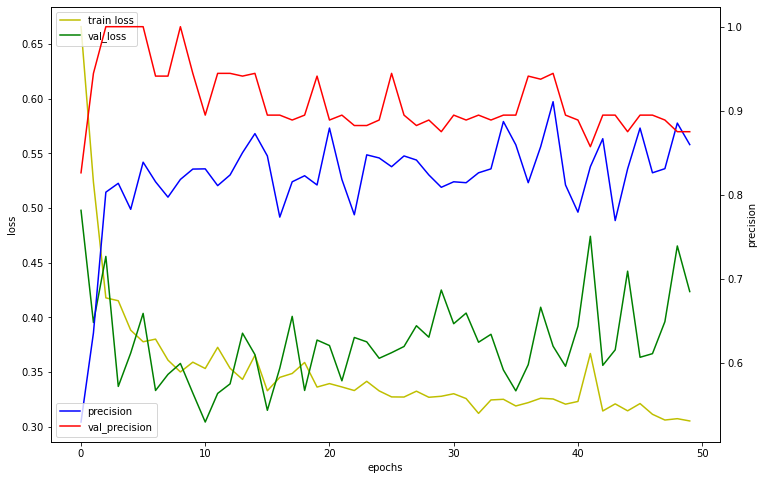

In [28]:
# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['precision'], 'b', label='precision')
acc_ax.plot(hist.history['val_precision'], 'r', label='val_precision')
acc_ax.set_ylabel('precision')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [31]:
# 5. 평가
score = model.evaluate(X_test, Y_test, verbose=0)
print('model loss :', score[0])
print('model accuracy :', score[1])
print('model recall : ', score[2])
print('model precision :', score[3])

model loss : 0.5022481679916382
model accuracy : 0.8314606547355652
model recall :  0.7659574747085571
model precision : 0.8999999761581421


In [35]:
# 6. confusion_metrix(성능 평가 지표)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred = model.predict(X_test)
pred = (pred>0.5)
pred
print(confusion_matrix(Y_test, pred), end='\n')
print('f1_score : ', f1_score(Y_test, pred))

[[38  4]
 [11 36]]
f1_score :  0.8275862068965516
